# Fisher Face 

#### Author: Tamal Majumder
* Github: https://github.com/t-majumder
* LinkedIn: https://www.linkedin.com/in/tamal-majumder/
* Dataset: olivetti_faces

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

# Load dataset
data = fetch_olivetti_faces()
images = data.images
n_samples, h, w = images.shape

# Flatten the images for LDA
X = images.reshape(n_samples, h * w)
y = data.target


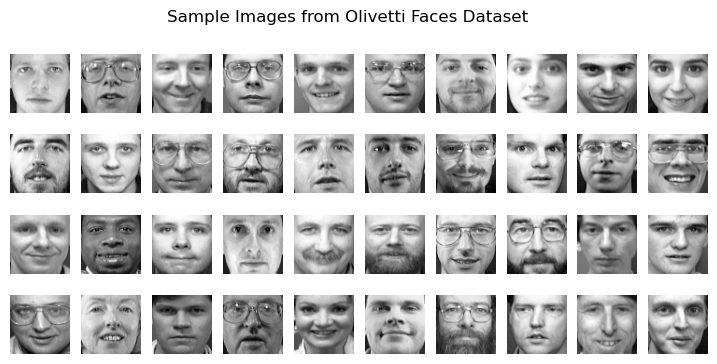

In [2]:
# Define indices for the images to be displayed
a = np.arange(0, 400, 10)  # Adjust as needed for your selection of images
# Create a figure and a set of subplots
fig, ax = plt.subplots(4, 10, figsize=(9, 4))
# Loop over the subplots and images
for i in range(40):
    ax[i // 10, i % 10].imshow(images[a[i]], cmap='gray')
    ax[i // 10, i % 10].axis('off')

plt.suptitle('Sample Images from Olivetti Faces Dataset')
plt.show()

### The Mean Face

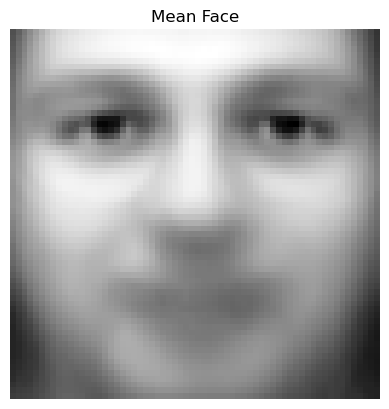

In [3]:
# Calculate and display the mean face
mean_face = np.mean(X, axis=0)
plt.imshow(mean_face.reshape(h, w), cmap='gray')
plt.title('Mean Face')
plt.axis('off')
plt.show()

# Center the data by subtracting the mean face
X_centered = X - mean_face


### Compute the class-wise mean faces and scatter matrices

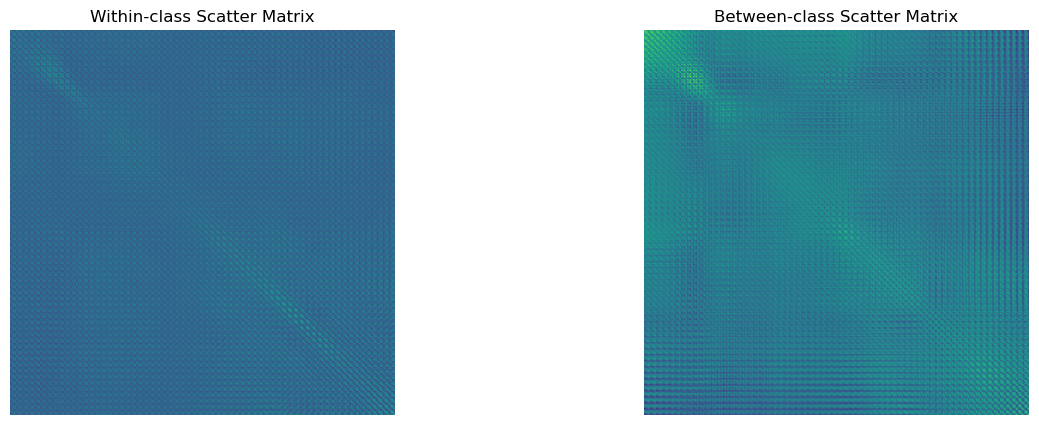

In [4]:
# Compute the class-wise mean faces and scatter matrices
classes = np.unique(y)
mean_vectors = []
S_W = np.zeros((X_centered.shape[1], X_centered.shape[1]))

for c in classes:
    X_c = X_centered[y == c]
    mean_c = np.mean(X_c, axis=0)
    mean_vectors.append(mean_c)
    S_W += np.cov(X_c, rowvar=False) * (X_c.shape[0] - 1)

# Compute the between-class scatter matrix
overall_mean = np.mean(X_centered, axis=0)
S_B = np.zeros((X_centered.shape[1], X_centered.shape[1]))

for i, mean_c in enumerate(mean_vectors):
    n_c = X_centered[y == classes[i]].shape[0]
    mean_diff = (mean_c - overall_mean).reshape(-1, 1)
    S_B += n_c * (mean_diff @ mean_diff.T)

# Plot scatter matrices
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(S_W, cmap='viridis')
ax[0].set_title('Within-class Scatter Matrix')
ax[0].axis('off')

ax[1].imshow(S_B, cmap='viridis')
ax[1].set_title('Between-class Scatter Matrix')
ax[1].axis('off')

plt.show()


### Solve the generalized eigenvalue problem for $\S_W^{-1} S_B$

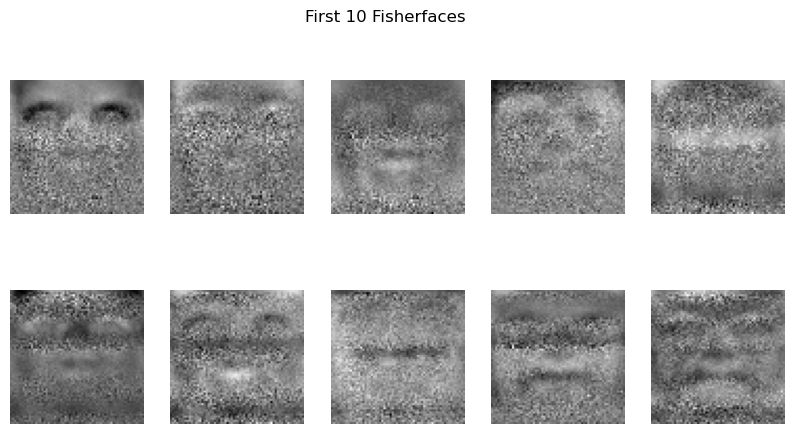

In [5]:
# Solve the generalized eigenvalue problem for S_W^{-1} S_B
eigenvalues, eigenvectors = np.linalg.eigh(np.linalg.inv(S_W).dot(S_B))

# Sort the eigenvalues and eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Display the first 10 Fisherfaces
fig, ax = plt.subplots(2, 5, figsize=(10, 5))
for i in range(10):
    fisherface = eigenvectors[:, i].reshape(h, w)
    ax[i // 5, i % 5].imshow(fisherface, cmap='gray')
    ax[i // 5, i % 5].axis('off')
plt.suptitle('First 10 Fisherfaces')
plt.show()


In [14]:
# Project the data onto the Fisherface space
X_lda = X_centered.dot(eigenvectors)

In [15]:
# Split data into training and test sets (here we use all data for both)
X_train = X_lda
y_train = y
X_test = X_lda
y_test = y


In [8]:
def nearest_neighbor(X_train, y_train, X_test):
    # Calculate Euclidean distance
    distances = np.linalg.norm(X_train[:, np.newaxis] - X_test, axis=2)
    # Predict the class of the closest training sample
    y_pred = y_train[np.argmin(distances, axis=0)]
    return y_pred

# Perform classification
y_pred = nearest_neighbor(X_train, y_train, X_test)


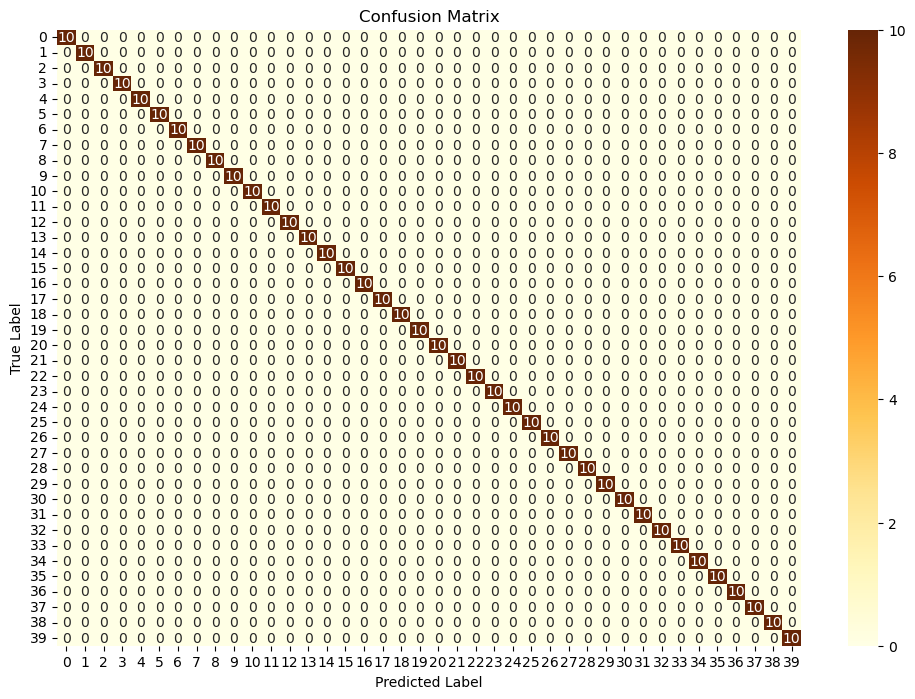

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(12,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlOrBr', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [23]:
from sklearn.metrics import accuracy_score

# Compute accuracy
accuracy = accuracy_score(y, y_pred)

# Print accuracy
print("Accuracy:", accuracy*100,"%")


Accuracy: 100.0 %
